# Notes on varient Calling/ SNP calling / Genotyping

## Introduction
What is genetic variation ?

varient = a specific region of the genome which differs between two genomes.
allele = different versions of the same varient

Impact of SNVs on differential methylation. 
Given that over two thirds of all Single Nucleotide Polymorphisms (SNPs) occur in a CpG context sequence variation needs to be addressed as an important error source.
 
Papers to read:
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3593722/

2. http://people.csail.mit.edu/dnaase/bissnp2011/

SNP calling is a bit of a misnomer, as it implies finding "SNPs" in NGS data. Without information about population frequency or function, it is premature to call a single nucleotide change a "polymorphism". With that caveat in mind, "SNP calling" in the context of NGS data analysis might be defined as the process of finding bases in the NGS data that differ from the reference genome, typically including an associated confidence score or statistical evidence metric. Since NGS data all have finite errors, this process requires that a given reference base be read by the NGS technology multiple times. The details of this analysis vary somewhat by application, but an early and still applicable description can be found in the paper by Heng Li describing the MAQ alignment and variant calling algorithm:

http://www.ncbi.nlm.nih.gov/pubmed/18714091

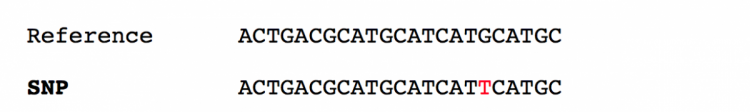

In [4]:
from IPython.display import Image                        
url='http://www.ebi.ac.uk/training/online/sites/ebi.ac.uk.training.online/files/resize/GenVar_Fig_SNP_2-750x112.png'
Image(url,width=500, height=100)

For whole genome or exome variant calling we follow a three step process:

1. Carry out whole genome or whole exome sequencing to create FASTQ files.
2. Align the sequences to a reference genome, creating BAM or CRAM files.
3. Identify where the aligned reads differ from the reference genome and write to a VCF file.

# Using MethylExtract

####  MethylExtract: High-Quality methylation maps and SNV calling from whole genome bisulfite sequencing data
https://f1000research.com/articles/2-217/v2

published tool. Comparably improved against Bis-SNP

MethylExtract writes two output files. 

1. the methylation information for each cytosine including the coordinates, sequence context (CG, CHG, CHH), number of methylcytosines, read coverage and mean base quality (PHRED) score. 

2.  output file reports the sequence variation in standard VCF format.

Work-flow for MethyExtract varient calling

1. Put all the BAM files from C01 in one folder and C02 in another folder

2. call MethylExtract as follows

```bash

#!/bin/sh
#SBATCH --time=24:00:00 -n24 -p bynode

perl /home/gunasekara/MethylExtract_1.9.1/MethylExtract.pl seq=./Homo_sapiens.GRCh38.dna.primary_assembly.fa inDir=./C02 flagW=99,147 flagC=83,163

```

This was running for 24 hours and still didnt' completed. so started runing for chr19 with selected bam files.


```bash

#!/bin/sh
#SBATCH --time=24:00:00 -n24 -p bynode

perl /home/gunasekara/MethylExtract_1.9.1/MethylExtract.pl seq=./chr19.fa inDir=./bam_files flagW=99,147 flagC=83,163 p=8 chromDiv=800 memNumReads=500000 wigOut=Y bedOut=Y delDup=Y peOverlap=Y

```

This tool should output a VCF file.

Variant Call Format (VCF) is a text file format for storing marker and genotype data. This short tutorial describes how Variant Call Format encodes data for single nucleotide variants.

Every VCF file has three parts in the following order:

1. Meta-information lines (lines beginning with "##").
2. One header line (line beginning with "#CHROM").
3. Data lines contain marker and genotype data (one variant per line). A data line is called a VCF record

VCF text files contain meta-information lines, a
header line with column names, data lines with information about a position in the genome,
and optional genotype information on samples for each position.


VCF is a format for describing locus


BS-SNPer
https://github.com/hellbelly/BS-Snper

# Processing VCF File

## VCF Tools

## pyVCF

## ANNOVAR

## wANNOVAR

## VarientAnnotation R package

In [3]:
## try http:// if https:// URLs are not supported
source("https://bioconductor.org/biocLite.R")
biocLite("VariantAnnotation")

Bioconductor version 3.5 (BiocInstaller 1.26.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.5 (BiocInstaller 1.26.1), R 3.4.1 (2017-06-30).
Installing package(s) 'VariantAnnotation'


package 'VariantAnnotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gunaseka\AppData\Local\Temp\RtmpYh5TG2\downloaded_packages


Old packages: 'backports', 'BH', 'boot', 'car', 'caret', 'crayon', 'curl',
  'DBI', 'dplyr', 'evaluate', 'foreign', 'glmnet', 'haven', 'htmlwidgets',
  'httpuv', 'httr', 'knitr', 'lme4', 'Matrix', 'mgcv', 'modelr', 'openssl',
  'PKI', 'psych', 'purrr', 'quantmod', 'R6', 'Rcpp', 'repr', 'rlang',
  'rmarkdown', 'rsconnect', 'rstudioapi', 'scales', 'shiny', 'tibble', 'tidyr',
  'TTR', 'xts'


In [4]:
library(VariantAnnotation)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: GenomeInfoDb
Loading required package: S4Vectors
Loading req

In [7]:
fl <- system.file("extdata", "chr22.vcf.gz", package="VariantAnnotation")
vcf <- readVcf(fl, "hg19")
vcf

class: CollapsedVCF 
dim: 10376 5 
rowRanges(vcf):
  GRanges with 5 metadata columns: paramRangeID, REF, ALT, QUAL, FILTER
info(vcf):
  DataFrame with 22 columns: LDAF, AVGPOST, RSQ, ERATE, THETA, CIEND, CIPOS,...
info(header(vcf)):
             Number Type    Description                                        
   LDAF      1      Float   MLE Allele Frequency Accounting for LD             
   AVGPOST   1      Float   Average posterior probability from MaCH/Thunder    
   RSQ       1      Float   Genotype imputation quality from MaCH/Thunder      
   ERATE     1      Float   Per-marker Mutation rate from MaCH/Thunder         
   THETA     1      Float   Per-marker Transition rate from MaCH/Thunder       
   CIEND     2      Integer Confidence interval around END for imprecise var...
   CIPOS     2      Integer Confidence interval around POS for imprecise var...
   END       1      Integer End position of the variant described in this re...
   HOMLEN    .      Integer Length of base pair

## Using Biscuit


# Using bis-SNP


